In [ ]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

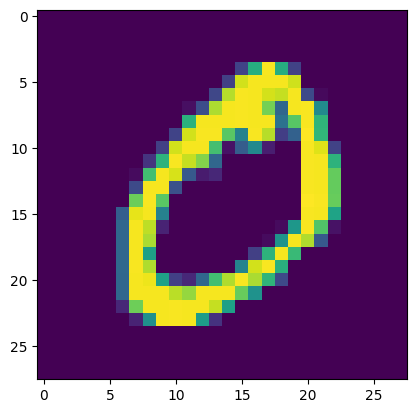

In [ ]:
plt.imshow(X_train[1])

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2]
print(num_pixels)

784


In [ ]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

In [ ]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


In [ ]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 39s - loss: 0.1867 - accuracy: 0.9444 - val_loss: 0.1284 - val_accuracy: 0.9583 - 39s/epoch - 21ms/step
Epoch 2/10
1875/1875 - 31s - loss: 0.0790 - accuracy: 0.9755 - val_loss: 0.0749 - val_accuracy: 0.9780 - 31s/epoch - 17ms/step
Epoch 3/10
1875/1875 - 22s - loss: 0.0534 - accuracy: 0.9834 - val_loss: 0.0641 - val_accuracy: 0.9803 - 22s/epoch - 12ms/step
Epoch 4/10
1875/1875 - 20s - loss: 0.0388 - accuracy: 0.9877 - val_loss: 0.0892 - val_accuracy: 0.9740 - 20s/epoch - 11ms/step
Epoch 5/10
1875/1875 - 23s - loss: 0.0325 - accuracy: 0.9894 - val_loss: 0.0853 - val_accuracy: 0.9773 - 23s/epoch - 12ms/step
Epoch 6/10
1875/1875 - 20s - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.0896 - val_accuracy: 0.9774 - 20s/epoch - 10ms/step
Epoch 7/10
1875/1875 - 21s - loss: 0.0226 - accuracy: 0.9929 - val_loss: 0.0954 - val_accuracy: 0.9759 - 21s/epoch - 11ms/step
Epoch 8/10
1875/1875 - 20s - loss: 0.0190 - accuracy: 0.9941 - val_loss: 0.1056 - val_accuracy: 0.9772 - 20s/ep

In [ ]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.9821000099182129% 
 Error: 0.01789999008178711


In [ ]:
model.save('classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model

In [ ]:
pretrained_model = load_model('classification_model.h5')